In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dir=tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
cols=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
data=pd.read_csv(dir,sep=" ",names=cols,skipinitialspace=True,na_values='?',comment='\t')
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [0]:
data=data.dropna(0)

In [0]:
data['Origin']=data['Origin'].map({1:"USA",2:"China",3:"Vietnam"})

In [0]:
data=pd.get_dummies(data)

In [7]:
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_China,Origin_USA,Origin_Vietnam
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,1,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,1,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,1,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,1,0


In [0]:
train_data=data.sample(frac=0.8)
test_data=data.drop(train_data.index)

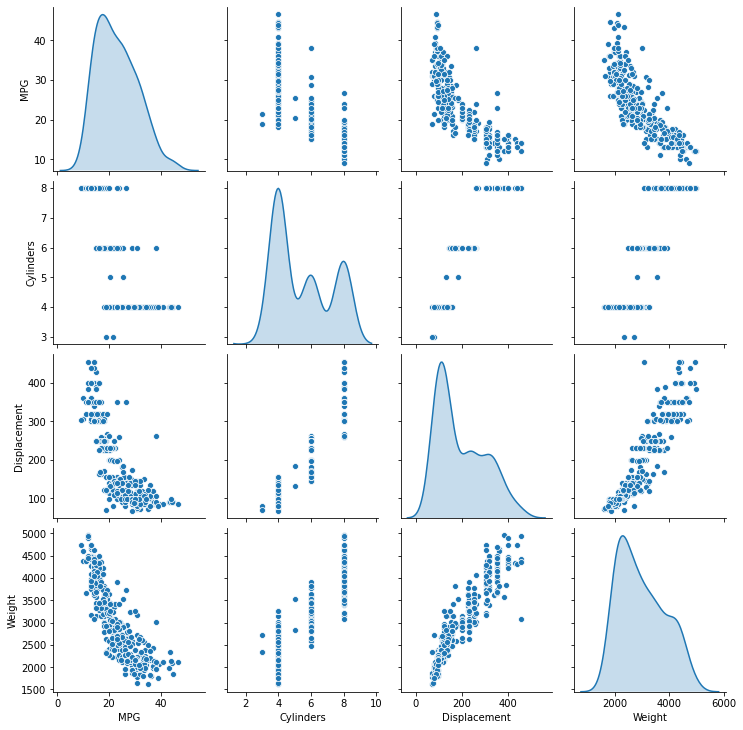

In [9]:
sb.pairplot(train_data[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [0]:
train_lbl=train_data.pop('MPG')
test_lbl=test_data.pop('MPG')

In [0]:
def norm(data):
  mean=data.mean()
  std=data.std()
  return((data-mean)/std)
train_data=norm(train_data)
test_data=norm(test_data)

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Dense(64,activation='relu',input_shape=[len(train_data.keys()),]),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(1)])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.RMSprop(0.001),metrics=['accuracy'])

In [15]:
model.fit(train_data,train_lbl,epochs=1000,validation_split=0.2)

Epoch 1/1000
8/8 [==============================] - 0s 23ms/step - loss: 563.9540 - accuracy: 0.0000e+00 - val_loss: 464.8140 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 480.3329 - accuracy: 0.0000e+00 - val_loss: 388.5045 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 395.0301 - accuracy: 0.0000e+00 - val_loss: 304.5237 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 304.4778 - accuracy: 0.0000e+00 - val_loss: 225.7836 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 219.7174 - accuracy: 0.0000e+00 - val_loss: 152.8731 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 145.4188 - accuracy: 0.0000e+00 - val_loss: 93.8726 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: 88.2480 - accura

In [0]:
k=model.predict(test_data)

In [17]:
k

array([[15.7622385],
       [15.8989105],
       [24.121529 ],
       [20.027763 ],
       [24.916523 ],
       [20.25595  ],
       [22.659056 ],
       [10.821568 ],
       [17.089668 ],
       [27.004608 ],
       [13.088865 ],
       [14.938658 ],
       [12.406991 ],
       [19.950562 ],
       [23.752455 ],
       [12.395026 ],
       [12.425905 ],
       [12.376293 ],
       [16.711123 ],
       [27.511206 ],
       [11.028267 ],
       [19.96351  ],
       [12.780133 ],
       [17.809017 ],
       [15.290511 ],
       [27.089493 ],
       [25.425283 ],
       [14.52851  ],
       [14.462046 ],
       [16.111225 ],
       [15.817298 ],
       [24.76622  ],
       [17.810854 ],
       [25.124466 ],
       [20.376234 ],
       [31.897202 ],
       [29.84048  ],
       [14.362141 ],
       [15.920711 ],
       [22.517376 ],
       [28.264927 ],
       [23.75614  ],
       [38.834904 ],
       [33.025345 ],
       [17.77714  ],
       [17.042276 ],
       [20.562775 ],
       [16.37

In [24]:
k[[14]]

array([[23.752455]], dtype=float32)

In [19]:
test_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_China,Origin_USA,Origin_Vietnam
2,1.560617,1.220960,1.331248,0.598767,-1.577477,-1.692251,-0.423659,0.785485,-0.544200
12,1.560617,1.979877,1.331248,0.960484,-2.122559,-1.692251,-0.423659,0.785485,-0.544200
14,-0.769108,-0.676333,-0.177218,-0.585440,-0.123925,-1.692251,-0.423659,-1.256777,1.814001
16,0.395755,0.119604,-0.122365,-0.138023,0.057769,-1.692251,-0.423659,0.785485,-0.544200
18,-0.769108,-0.824415,-0.369205,-0.854780,-0.305619,-1.692251,-0.423659,-1.256777,1.814001


In [21]:
test_lbl

2      18.0
12     15.0
14     24.0
16     18.0
18     27.0
       ... 
372    27.0
375    36.0
379    36.0
385    38.0
396    28.0
Name: MPG, Length: 78, dtype: float64